# EXPLORING FINANCIAL MARKET TREND ANALYSIS

### Table of Contents

By following this roadmap, readers can gain a comprehensive understanding of the stock market, learn how to leverage Data Science for financial analysis, and optimize investment strategies for maximum returns. Let's get started!
1. [Introduction](#1-introduction)
2. [Data Collection and Preprocessing](#2-data-collection-and-preprocessing)
   - [Key Libraries](#key-libraries)
   - [Stock Data Retrieval with APIs](#stock-data-retrieval-with-apis)
   - [Data Cleaning and Formatting](#data-cleaning-and-formatting)
   - [Feature Engineering for Machine Learning](#feature-engineering-for-machine-learning)
   - [Selected Features for Stock Price Analysis](#selected-features-for-stock-price-analysis)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
   - [Statistical Summaries](#statistical-summaries)
   - [Visualizing Trends](#visualizing-trends)
4. [Financial Metrics](#4-financial-metrics)
   - [Performance Metrics](#performance-metrics)
   - [Risk and Volatility Analysis](#risk-and-volatility-analysis)
5. [Machine Learning Applications](#5-machine-learning-applications)
   - [Predictive Modeling](#predictive-modeling)
   - [Classification Tasks](#classification-tasks)
   - [Clustering Analysis](#clustering-analysis)
6. [Portfolio Optimization](#6-portfolio-optimization)
   - [Markowitz Mean-Variance Optimization](#markowitz-mean-variance-optimization)
   - [Black-Litterman Allocation](#black-litterman-allocation)
   - [Reinforcement Learning Approaches](#reinforcement-learning-approaches)
7. [Backtesting Investment Strategies](#7-backtesting-investment-strategies)
8. [Insights and Conclusions](#8-insights-and-conclusions)
9. [Future Work](#9-future-work)



## 1. Introduction
____

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Project Overview</h2>

The stock market is a dynamic and complex environment where investors face challenges such as identifying profitable opportunities, managing risk, and optimizing portfolio allocation. This project focuses on analyzing stock data for four leading technology companies: **Apple (AAPL)**, **Microsoft (MSFT)**, **Google (GOOGL)**, and **Amazon (AMZN)**. These companies were chosen for their significant market leadership, technological innovation, and global influence.



**Objectives**

1. **Data Analysis**:
   - Analyze historical stock data to uncover patterns, trends, and correlations.
   - Assess the impact of market-wide and stock-specific events on stock performance.

2. **Machine Learning**:
   - Build predictive models to forecast stock prices and classify stock movements.
   - Use classification models to predict uptrends or downtrends in stock returns.

3. **Portfolio Optimization**:
   - Develop investment strategies using optimization techniques.
   - Backtest portfolio performance to evaluate risk-adjusted returns.



**Problem Statement**

Investors in the stock market face critical challenges:

1. **Identifying Profitable Opportunities**:
   - Pinpoint stocks that consistently outperform the market.
   - Determine timing for entry and exit points based on trends and signals.

2. **Effective Risk Management**:
   - Quantify and minimize portfolio risk.
   - Analyze the correlation between assets to reduce overall volatility.

3. **Optimizing Asset Allocation**:
   - Allocate capital efficiently across assets to maximize returns.
   - Balance the trade-off between risk and reward through portfolio diversification.



**Significance of the Project**

By leveraging data analysis, machine learning, and optimization techniques, this project aims to provide actionable insights into stock market investments. It equips investors with tools to make data-driven decisions, mitigate risks, and improve portfolio performance in a rapidly evolving financial landscape.



## 2. Data Collection and Preprocessing
___



### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Key Libraries</h2>

The success of this project hinges on leveraging powerful Python libraries that enable financial analysis, portfolio optimization, and technical analysis. These libraries form the backbone of the notebook, facilitating data retrieval, manipulation, visualization, and modeling. Below is an overview of the key libraries used and their specific contributions to the project:


- **`yfinance`** 
  A popular library that provides access to historical stock price data, financial statements, and other key metrics for a wide range of stocks. It is a valuable resource for extracting stock data directly from Yahoo Finance for analysis.

- **`Quantstats`** 
  This library specializes in quantitative finance, offering tools for analyzing investment strategies, backtesting, and evaluating portfolio performance. It provides a comprehensive suite of functions for detailed financial analysis and visualization of key metrics


- **`PyPortfolioOpt`**
  This library focuses on portfolio optimization, enabling users to construct optimal portfolios based on various criteria such as risk, return, and constraints. It is a powerful tool for optimizing investment strategies, including mean-variance optimization and Black-Litterman models.

- **`TA-Lib`** 
  A Technical Analysis Library (TA-Lib) offers a wide range of technical indicators for analyzing stock price data. It includes functions for calculating moving averages, RSI, MACD, Bollinger Bands, and other commonly used technical indicators.

- **`Plotly`**
  This library offers interactive visualization capabilities, allowing users to create dynamic and engaging plots for exploring stock data. It provides tools for creating interactive charts, dashboards, and visualizations.

Other commonly used libraries: 

- **`Pandas`**
  This library is essential for data manipulation and analysis, allowing us to handle and preprocess stock data efficiently. It provides powerful data structures and functions for cleaning, transforming, and analyzing financial data.

- **`Numpy`**
  A fundamental library for numerical computing, Numpy provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

- **`Matplotlib and Seaborn`**
  This combination of libraries is used for data visualization, enabling the creation of informative plots, charts, and graphs to visualize trends, patterns, and relationships in the stock data.

- **`Scikit-Learn`**
  A machine learning library that provides a wide range of tools for building predictive models, evaluating performance, and optimizing parameters. It includes functions for regression, classification, clustering, and model evaluation.

By combining these libraries with Python's robust data science capabilities, we can unlock the full potential of financial analysis and stock market prediction. The subsequent sections will delve into the process of collecting, preprocessing, and analyzing stock data to derive actionable insights for investors.

In [7]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Handling and Statistical Analysis
import numpy as np
import pandas as pd
from pandas_datareader import data
from scipy import stats
import skimpy as sp

pd.set_option('display.max_columns', None)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import aes, geom_point, ggplot, labs
import plotnine as p9

# Interactive Visualization Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots

init_notebook_mode(connected=True)  # Enable Plotly offline

# Financial Data and Analysis
import quantstats as qs
import ta
import talib
import yfinance as yf
from pypfopt import BlackLittermanModel, black_litterman, expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier

qs.extend_pandas()

# Machine Learning and Optimization
from sklearn.datasets import make_classification
from sklearn.experimental import enable_halving_search_cv  # Required for HalvingGridSearchCV
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (
    GridSearchCV,
    HalvingGridSearchCV,
    RandomizedSearchCV,
    train_test_split,
)
import optuna


### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Data Retrieval with APIs</h2>

To initiate our analysis, we will retrieve historical stock price, and returns data for four prominent technology companies: 

- Apple: aapl

- Microsoft: msft

- Google (Alphabet): googl

- Amazon: amzn

We will utilize the `Quantstats` (qs) and `yfinance` (yf) libraries to retrieve data from Yahoo Finance. The data will cover the period from January 1, 2010, to December 31, 2021, providing over a decade of historical stock performance for analysis. The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. 

These companies were selected due to their significant market capitalization, technological innovation, and widespread global influence, making them representative of the technology sector and attractive for investment analysis.  The data will include daily stock prices, trading volume, and other relevant metrics that will serve as the foundation for our analysis. Let's begin by importing the necessary  stock data.


In [16]:
# Define the time window and stock tickers
start = '2010-01-01'
end = '2021-12-31'
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Loop through tickers to download and save data
for ticker in tickers:
    # Download returns
    returns = qs.utils.download_returns(ticker).loc[start:end]
    returns.to_csv(f'{ticker.lower()}_returns.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
# Loading the Stock Returns
aapl = pd.read_csv('aapl_returns.csv', index_col=0, parse_dates=True) 
msft = pd.read_csv('msft_returns.csv', index_col=0, parse_dates=True) 
googl = pd.read_csv('googl_returns.csv', index_col=0, parse_dates=True) 
amzn = pd.read_csv('amzn_returns.csv', index_col=0, parse_dates=True) 

In [19]:
# Display the first 5 rows of the Stock Returns
aapl.head()

,AAPL
Date,
2010-01-04 00:00:00+00:00,0.015565
2010-01-05 00:00:00+00:00,0.001729
2010-01-06 00:00:00+00:00,-0.015906
2010-01-07 00:00:00+00:00,-0.001849
2010-01-08 00:00:00+00:00,0.006648


In [20]:
# check the shape of the data
print(aapl.shape)
print(msft.shape)
print(googl.shape)
print(amzn.shape)

(3021, 1)
(3021, 1)
(3021, 1)
(3021, 1)


### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Data Cleaning and Formatting</h2>

This section focuses on cleaning and formatting stock data to ensure consistency, accuracy, and compatibility for analysis. The steps include handling missing values, standardizing column headers, and converting data types. The final cleaned data is stored in a Pandas DataFrame for easy manipulation and exploration.

**Handling Timezones**   
Financial data often includes timestamps in the UTC timezone. Since our data contains stock returns, we will convert the `timezone-aware DatetimeIndex` to a `timezone-naive DatetimeIndex`.
A timezone-naive DatetimeIndex has no associated timezone information. This conversion is crucial for maintaining compatibility with financial analysis tools and libraries.


**Standardizing Columns and Data Types**   
The column names will be renamed for clarity and uniformity. Data types will be converted appropriately to ensure compatibility with further analysis and visualization tools.

In [21]:
# converting time zone to none
aapl.index = aapl.index.tz_convert(None)
msft.index = msft.index.tz_convert(None)
googl.index = googl.index.tz_convert(None)
amzn.index = amzn.index.tz_convert(None)

In [22]:
# Convert the columns to lowercase
aapl.columns = aapl.columns.str.lower()
msft.columns = msft.columns.str.lower()
googl.columns = googl.columns.str.lower()
amzn.columns = amzn.columns.str.lower()

## 3. Data Insight and Analysis
___




The Focus of this section is to provide insights into the stock data through exploratory data analysis (EDA), statistical summaries, and visualizations. This process involves examining key metrics such as stock prices, trading volume, and returns to identify trends, patterns, and relationships. By visualizing the data and calculating relevant statistics, we can gain a deeper understanding of the stock performance and potential investment opportunities.



### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Stock Daily Returns with S&P 500 as a Benchmark</h2>

We now have the daily returns data for the four stocks: Apple (AAPL), Microsoft (MSFT), Google (GOOGL), and Amazon (AMZN). To gain deeper insights into their performance, we will benchmark their daily returns against the S&P 500 Index. The S&P 500, commonly symbolized as `^GSPC`, is a widely recognized measure of the overall US stock market. It represents 500 large-cap companies listed on US exchanges, making it a comprehensive indicator of market performance. Comparing stock returns to the S&P 500 provides the following insights:

1. **Performance Comparison:** Benchmarking helps evaluate whether a stock outperforms or underperforms the broader market.It highlights the stock's volatility compared to the market.

2. **Risk Analysis:** Analyzing the correlation between stock returns and the S&P 500 reveals sensitivity to market movements. This is critical for understanding the risk profile of the stock.    

3. **Beta Calculation:** Beta quantifies a stock's volatility relative to the market. Calculating beta requires the daily returns of both the stock and the benchmark (S&P 500).    

4. **Market Trends and Context:** Comparing stock returns with the S&P 500 provides context for movements. Are the returns driven by market-wide trends or stock-specific factors?

5. **Portfolio Evaluation:** Benchmarking shows how a stock contributes to overall portfolio performance and diversification.



**Data and Methodology**   
We will retrieve the historical price data for the S&P 500 Index (^GSPC) over the same period as the stock data: January 1, 2010, to December 31, 2021. The daily returns for the S&P 500 will then be calculated and used to benchmark the selected stocks.
Using QuantStats, we will generate daily returns plots for each stock alongside the S&P 500. These plots will enable a clear visual comparison of the stocks' performance and their relationship with the broader market. This approach provides a comprehensive understanding of each stock's relative performance, risk, and contribution to a portfolio.


Apple Daily Returns Plot:



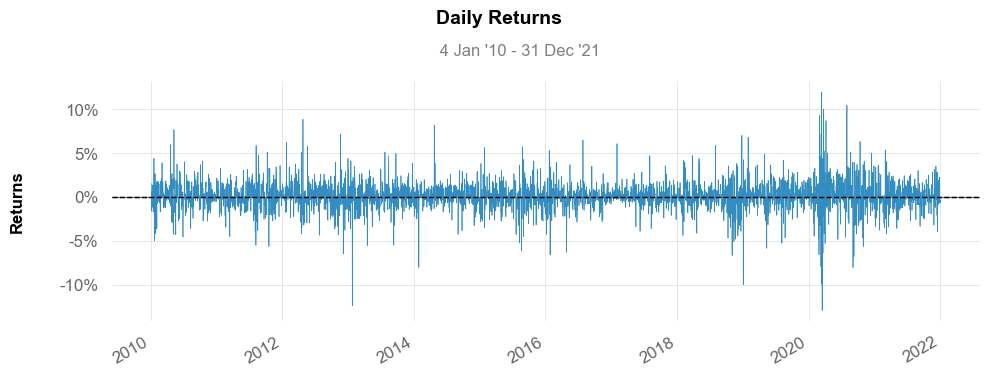




Microsoft Daily Returns Plot:



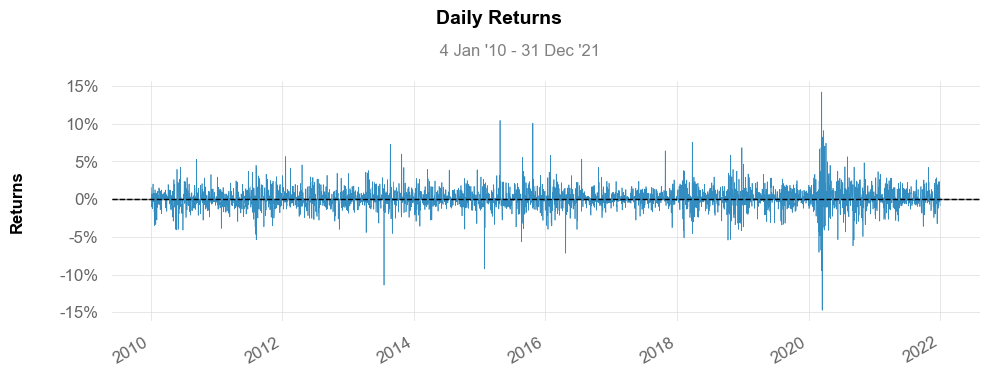




Google Daily Returns Plot:



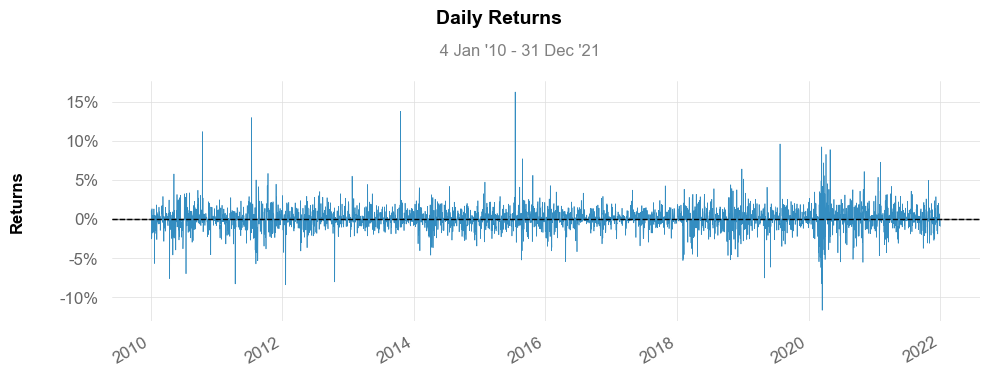




Amazon Daily Returns Plot:



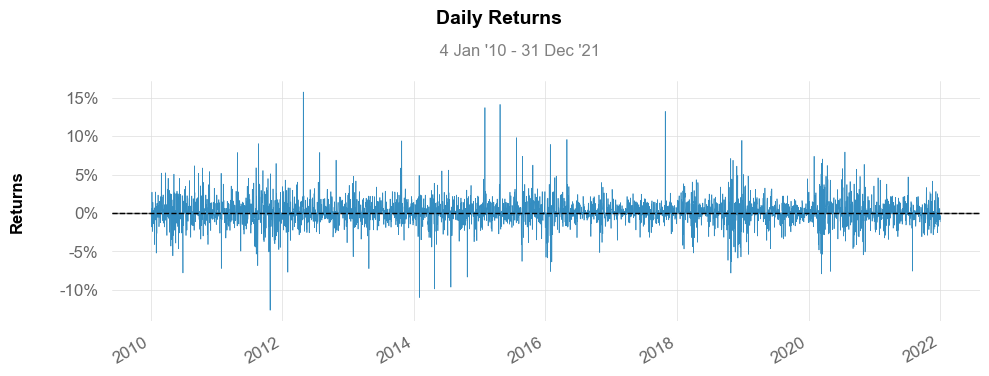

In [70]:
# Plotting Daily Returns for each stock and the S&P 500
print('\nApple Daily Returns Plot:\n')
qs.plots.daily_returns(aapl, benchmark='^GSPC')
print('\n')
 

print('\nMicrosoft Daily Returns Plot:\n')
qs.plots.daily_returns(msft, benchmark='^GSPC')
print('\n') 

print('\nGoogle Daily Returns Plot:\n')
qs.plots.daily_returns(googl, benchmark='^GSPC')
print('\n') 

print('\nAmazon Daily Returns Plot:\n')
qs.plots.daily_returns(amzn, benchmark='^GSPC') 


The plot above provide a visual representation of the daily returns for the four selected stocks (Apple, Microsoft, Google, Amazon) and the S&P 500 index. The chart illustrates the volatility and performance of each stock relative to the broader market. By comparing the stock returns to the S&P 500 index, we can identify periods of outperformance or underperformance and assess the risk-adjusted returns of the stocks.

Apple (AAPL) and Amazon (AMZN) exhibit higher volatility compared to Microsoft (MSFT) and Google (GOOGL), with more pronounced fluctuations in daily returns. The S&P 500 index serves as a benchmark for evaluating the relative performance of the stocks, providing a reference point for assessing risk-adjusted returns. The chart highlights the dynamic nature of stock returns and the importance of monitoring performance relative to the broader market.

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Cumulative Daily Returns</h2>

To gain further insights into the stock performance, we will calculate the cumulative returns for each stock and the S&P 500 index. The cumulative returns represent the total return on investment over a specified period, taking into account both price appreciation and dividends. By analyzing the cumulative returns, we can assess the long-term performance of the stocks and compare them to the broader market index.




Apple Cumulative Returns Plot



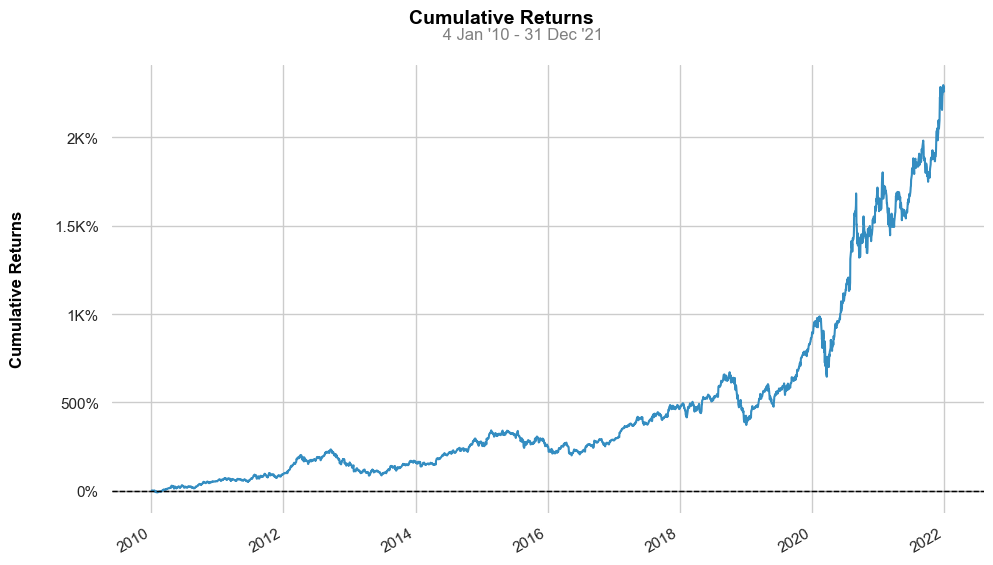






Microsoft Inc. Cumulative Returns Plot



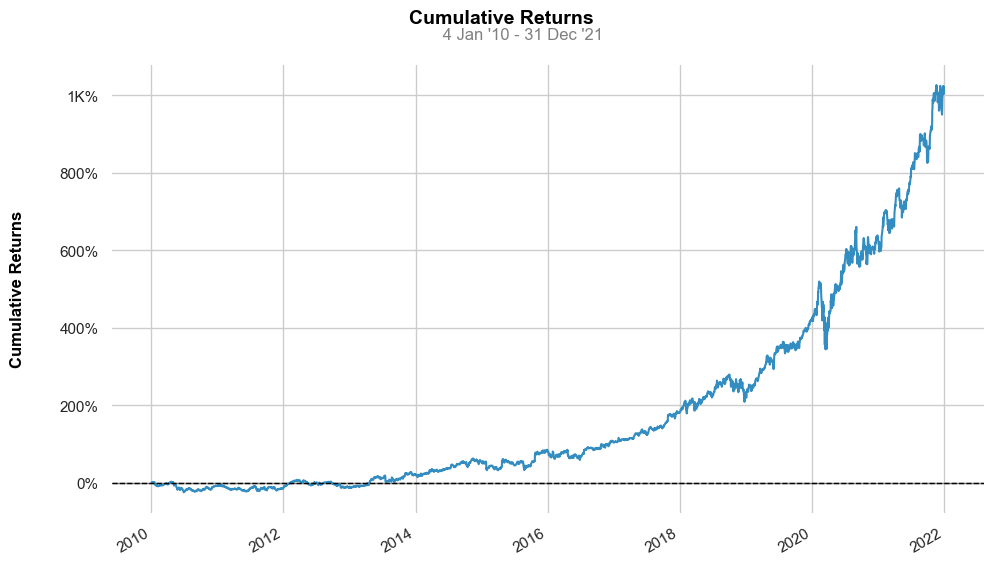






The Google Cumulative Returns Plot



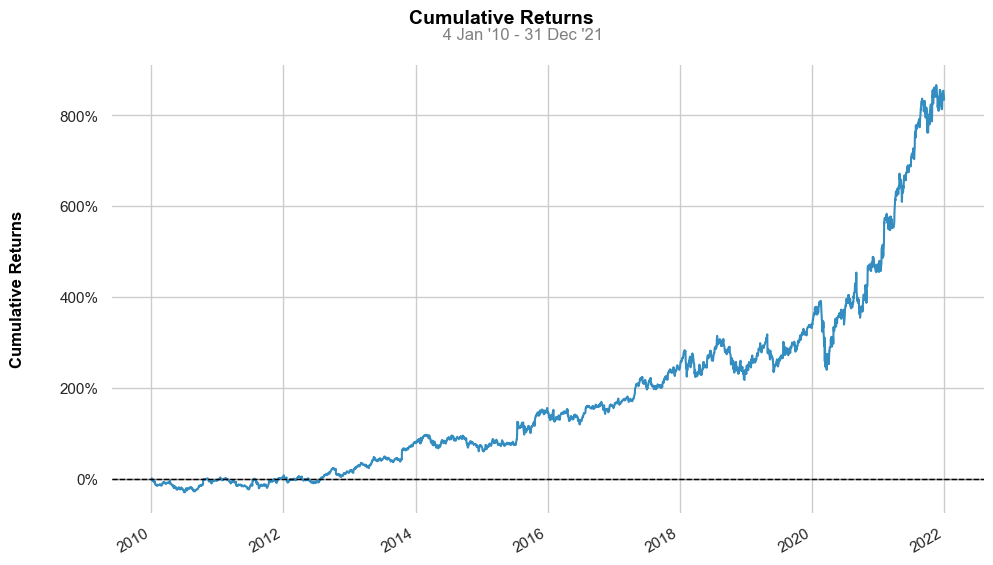

In [326]:
# Plotting Cumulative Returns for each stock
print('\n')
print('\nApple Cumulative Returns Plot\n')
qs.plots.returns(aapl)
print('\n')
print('\n')
print('\nMicrosoft Inc. Cumulative Returns Plot\n')
qs.plots.returns(msft)
print('\n')
print('\n')
print('\nThe Google Cumulative Returns Plot\n')
qs.plots.returns(googl)
print('\n')

The chart above shows a comparison of the cumulative returns for the four selected stocks (Apple, Microsoft, Google, Amazon) and the S&P 500 index. The cumulative returns provide a comprehensive view of the long-term performance of each stock, capturing the total return on investment over the specified period. By analyzing the cumulative returns, we can identify trends, patterns, and relative performance among the stocks.

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Histogram of Daily Returns</h2>

The histogram of daily returns provides insights into the distribution of returns for each stock and the S&P 500 index. By visualizing the frequency and magnitude of daily returns, we can assess the volatility, risk, and performance characteristics of the stocks. The histogram highlights the distribution of returns, including the mean, standard deviation, and skewness of the returns.

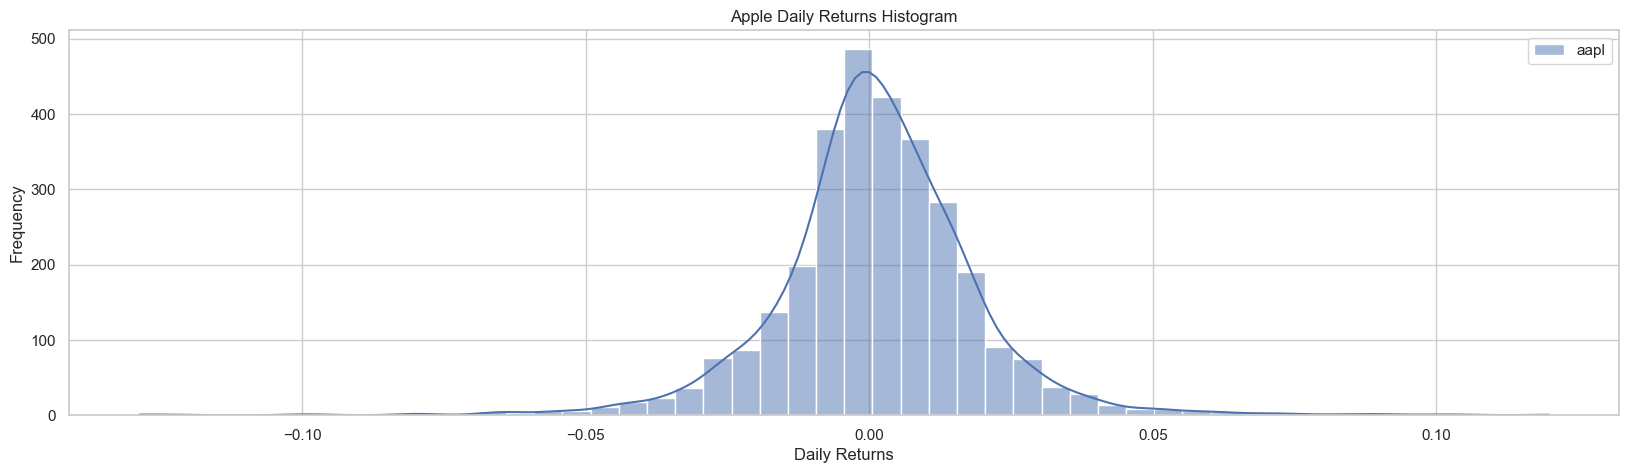

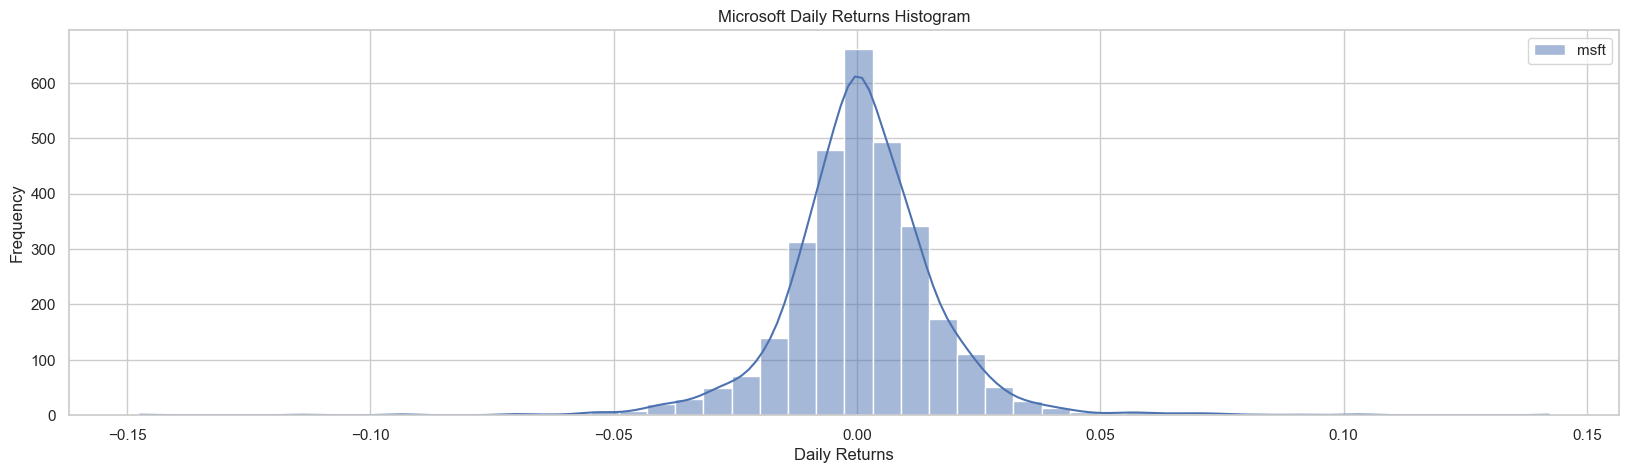

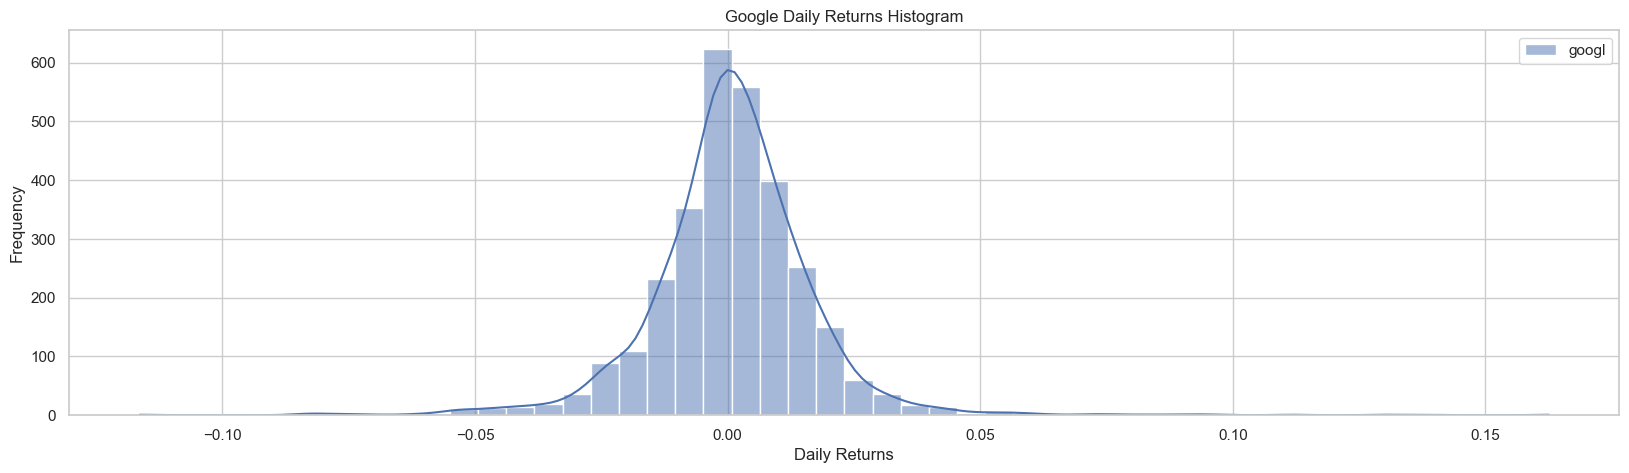

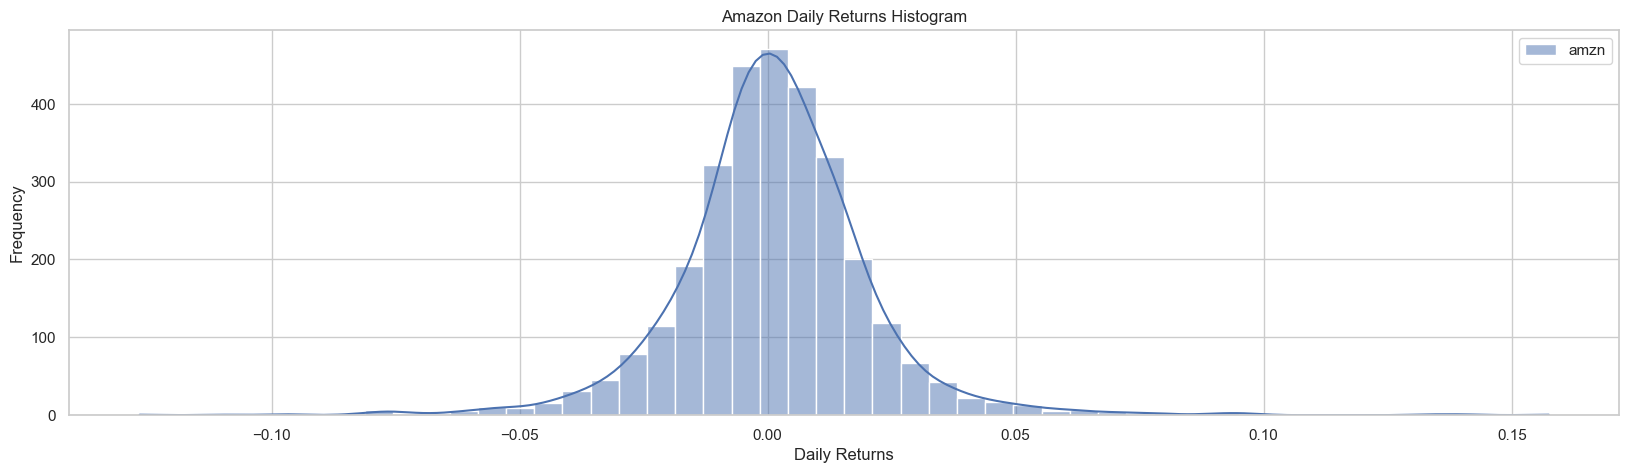

In [327]:
# Create histograms for daily returns
# Apple
plt.figure(figsize=(20, 5))
sns.histplot(aapl, bins=50, kde=True, color='cyan')
plt.title('Apple Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Microsoft
plt.figure(figsize=(20, 5))
sns.histplot(msft, bins=50, kde=True, color='green')
plt.title('Microsoft Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Google
plt.figure(figsize=(20, 5))
sns.histplot(googl, bins=50, kde=True, color='orange')
plt.title('Google Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

# Amazon
plt.figure(figsize=(20, 5))
sns.histplot(amzn, bins=50, kde=True, color='purple')
plt.title('Amazon Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()


Through the analysis of the histogram, it is observed that the daily returns for the selected stocks and the S&P 500 index exhibit a normal distribution, with a mean close to zero and a standard deviation that reflects the volatility of the returns. The histogram provides a visual representation of the distribution of returns, enabling investors to assess the risk and performance characteristics of the stocks.

### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Kurtosis of Daily Returns</h2>

Kurtosis is a statistical measure that quantifies the shape of the distribution of returns. It provides insights into the tails of the distribution, indicating the presence of outliers or extreme values. 

The interpretation of kurtosis values is as follows:

- A mesokurtic distribution is medium-tailed, so outliers are neither highly frequent, nor highly infrequent. The kurtosis value is close to zero.

- A leptokurtic distribution is heavy-tailed, meaning that outliers are more frequent than in a normal distribution. The kurtosis value is greater than zero.

- A platykurtic distribution is light-tailed, indicating that outliers are less frequent than in a normal distribution. The kurtosis value is less than zero.


In [ ]:
# Using quantstats to measure kurtosis
# Apple
aapl_kurtosis = qs.stats.kurtosis(aapl).values[0].round(2)
print("Apple's kurtosis: ", aapl_kurtosis)
print('\n')

# Microsoft
msft_kurtosis = qs.stats.kurtosis(msft).values[0].round(2)
print("Microsoft's kurtosis: ", msft_kurtosis)
print('\n')

# Google
googl_kurtosis = qs.stats.kurtosis(googl).values[0].round(2)
print("Google's kurtosis: ", googl_kurtosis)
print('\n')

# Amazon
amzn_kurtosis = qs.stats.kurtosis(amzn).values[0].round(2)
print("Amazon's kurtosis: ", amzn_kurtosis)
print('\n')



Apple's kurtosis:  5.78


Microsoft's kurtosis:  9.6


Google's kurtosis:  10.91


Amazon's kurtosis:  6.86




From the above calculation, the key insights is that all the returns are above 3, which indicates that the returns are leptokurtic. This implies that the distributions of the returns have heavier tails and more extreme outliers than a normal distribution. The kurtosis values suggest that the stocks exhibit higher risk due to the potential for large deviations from the mean. The kurtosis values provide valuable insights into the risk characteristics of the stocks and can help investors assess the potential for extreme price movements.

The formula output indicates the kurtosis of daily returns for Apple, Microsoft, Google, and Amazon stocks. Here's how to interpret the values:

**Key Insights**
1. **Kurtosis > 3 (Leptokurtic)**:
   - The distributions of these returns have heavier tails and more extreme outliers than a normal distribution (kurtosis of 3). 
   - This suggests that the stocks exhibit **higher risk** due to the potential for large deviations from the mean.

2. **Kurtosis Breakdown**:
   - **Apple (5.78)**:
     - Indicates moderate outliers compared to the others, but still significant deviation from normality.
     - Risk of large, infrequent price changes exists but less extreme than Microsoft and Google.
   - **Microsoft (9.6)**:
     - Very high kurtosis suggests significant tail risk, indicating the potential for extreme price movements in Microsoft's returns.
     - This could imply higher volatility and risk exposure.
   - **Google (10.91)**:
     - Highest kurtosis in the group, meaning Google's returns are prone to extreme deviations more frequently than others.
     - Suggests that Google's stock has the most **unpredictable risk** in terms of rare events or outliers.
   - **Amazon (6.86)**:
     - Moderate tail risk compared to Microsoft and Google but higher than Apple.
     - Indicates potential for occasional extreme movements but less extreme compared to Google.


### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Skewness of Daily Returns</h2>

The skewness of daily returns provides insights into the symmetry and shape of the distribution of returns. It quantifies the degree of asymmetry in the distribution, indicating whether the returns are skewed to the left or right. 

- A positive skewness value indicates that the distribution is skewed to the right, with a longer tail on the right side of the distribution. 

- A negative skewness value indicates that the distribution is skewed to the left, with a longer tail on the left side of the distribution.


In [329]:
# Measuring skewness with quantstats
print('\n')
print("Apple's skewness: ", qs.stats.skew(aapl).round(2))
print('\n')
print("Microsoft's skewness: ", qs.stats.skew(msft).round(2))
print('\n')
print("Google's skewness: ", qs.stats.skew(googl).round(2))
print('\n')
print("Amazon's skewness: ", qs.stats.skew(amzn).round(2))
print('\n')



Apple's skewness:  aapl   -0.1
dtype: float64


Microsoft's skewness:  msft    0.04
dtype: float64


Google's skewness:  googl    0.54
dtype: float64


Amazon's skewness:  amzn    0.35
dtype: float64




**Skewness Analysis and Interpretation**

The skewness values of daily returns for Apple, Microsoft, Google, and Amazon provide insights into the symmetry of their return distributions:

1. Apple (-0.1): The skewness value falls between -0.5 and +0.5, indicating that Apple’s daily returns distribution is approximately symmetrical. The slight negative skewness suggests a negligible tendency for the data to have more values greater than the mean.

2. Microsoft (0.04): Similarly, Microsoft’s skewness is also within the range of -0.5 and +0.5, meaning its daily returns distribution is approximately symmetrical. The positive skewness indicates a minor inclination for values to be smaller than the mean, but this deviation is nearly insignificant.

3. Google (0.54): Google’s skewness lies between +0.5 and +1, suggesting a slightly positively skewed distribution. This indicates a mild tendency for more values to be smaller than the mean, with a slight right tail in the distribution.

4. Amazon (0.35): Amazon’s skewness value also falls within -0.5 and +0.5, showing that its daily returns distribution is approximately symmetrical. The positive skewness indicates a very slight bias toward smaller values than the mean, though it is not significant.

Summary
* Apple, Microsoft, and Amazon: These stocks have skewness values close to zero, indicating approximately symmetrical distributions with no significant tail dominance.

* Google: Google exhibits slight positive skewness, suggesting mild asymmetry with a tendency for smaller values (right tail dominance).

Implications
* None of the stocks show substantial nonnormality or extreme skewness, making their return distributions relatively stable and suitable for models that assume normality.

* Google’s slight positive skewness could indicate the potential for mild upward deviations in daily returns, but this skewness remains within acceptable limits.


### <h3 id='daily-returns' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Standard Deviation of Daily Returns</h2>

The standard deviation of daily returns is a key metric for assessing the volatility and risk of the stocks. It quantifies the dispersion of returns around the mean, providing insights into the variability and potential price movements of the stocks. A higher standard deviation indicates greater volatility and risk, while a lower standard deviation suggests lower volatility and risk.

The standard deviation of daily returns for Apple, Microsoft, Google, and Amazon stocks is calculated to assess the volatility and risk characteristics of the stocks. The standard deviation provides insights into the variability and potential price movements of the stocks, helping investors assess the risk and return profile of each stock.

In [330]:
# Calculating Standard Deviations
print('\n')
print("Apple's Standard Deviation from 2010 to 2023: ", aapl.std().round(3))
print('\n')
print("Microsoft's Standard Deviation from 2010 to 2023: ", msft.std().round(3))
print('\n')
print("Google's Standard Deviation from 2010 to 2023: ", googl.std().round(3))
print('\n')
print("Amazon's Standard Deviation from 2010 to 2023: ", amzn.std().round(3))
print('\n')



Apple's Standard Deviation from 2010 to 2023:  aapl    0.018
dtype: float64


Microsoft's Standard Deviation from 2010 to 2023:  msft    0.016
dtype: float64


Google's Standard Deviation from 2010 to 2023:  googl    0.016
dtype: float64


Amazon's Standard Deviation from 2010 to 2023:  amzn    0.02
dtype: float64




**Interpretation of Standard Deviation for Apple, Microsoft, Google, and Amazon (2010-2023)**

Standard deviation is a measure of the volatility or the extent of variation in daily returns over a given period. A higher standard deviation indicates greater variability in returns, meaning the stock experiences larger price swings (higher risk), while a lower standard deviation suggests more stable returns.

**Key Interpretations**

Apple (0.018):
- Apple’s standard deviation of 0.018 implies moderate daily return volatility.
- The variability in Apple's returns is slightly lower than Amazon but higher than both Microsoft and Google, suggesting it is somewhat riskier than those two.

Microsoft (0.016):
- Microsoft’s standard deviation of 0.016 indicates relatively low daily return volatility.
- Microsoft exhibits the lowest variability in returns among the four stocks, suggesting it is the least risky in terms of daily price fluctuations.

Google (0.016):
- Google shares the same standard deviation as Microsoft (0.016), indicating similarly low return variability.
- Like Microsoft, Google offers relatively stable returns, which may appeal to investors seeking lower risk.

Amazon (0.02):
- Amazon has the highest standard deviation among the four stocks, at 0.02.
- This suggests Amazon exhibits the greatest daily return variability, indicating it is the riskiest of the group.

Comparison and Insights
* Most Volatile: Amazon, with the highest standard deviation (0.02), experiences the greatest fluctuations in daily returns. This aligns with its reputation for higher risk and growth potential.
* Least Volatile: Microsoft and Google, with the lowest standard deviations (0.016), are the most stable, offering consistent returns with minimal price swings.
* Moderate Risk: Apple, with a standard deviation of 0.018, sits between the stability of Microsoft/Google and the higher volatility of Amazon. It offers a balance of risk and return potential.

Implications
* Investors seeking lower risk may prefer Microsoft and Google, which exhibit the lowest return variability.
* Amazon, with the highest standard deviation, may appeal to investors seeking higher growth potential but should be approached with caution due to its greater risk.
* Apple offers a moderate risk-return profile, providing a balance between stability and growth potential.

### <h3 id = 'pairplots-correlation' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Pairplots and Correlation Matrix</h2>

Correlation analysis is crucial for identifying relationships between assets and optimizing portfolios. In your stock analysis of Apple, Microsoft, Google, and Amazon, it helps develop strategies like Long-Short, where positively correlated stocks move together, while negatively correlated stocks provide better opportunities for profit by moving in opposite directions.   

It also helps manage systemic risk, where a highly correlated portfolio may suffer significant losses if a specific sector faces a downturn. Diversifying with less correlated or negatively correlated assets reduces such risks.  
 
Tools like correlation matrices and pairplots visualize relationships between stocks. Correlation values range from -1 (perfect negative) to 1 (perfect positive), indicating whether assets move together or inversely. For example, analyzing correlations among these stocks can reveal opportunities for Long-Short strategies or diversification.
By integrating correlation analysis, you can uncover profitable strategies, mitigate risks, and make data-driven investment decisions.

In [45]:
# Merging daily returns into one dataframe
stock_returns = pd.concat([aapl, msft, googl, amzn], join = 'outer', axis = 1)

stock_returns.head()

,aapl,msft,googl,amzn
Date,,,,
2010-01-04,0.015565,0.015420,0.010920,-0.004609
2010-01-05,0.001729,0.000323,-0.004404,0.005900
2010-01-06,-0.015906,-0.006137,-0.025209,-0.018116
2010-01-07,-0.001849,-0.010400,-0.023280,-0.017013
2010-01-08,0.006648,0.006897,0.013331,0.027077


In [46]:
stock_returns.shape

(3021, 4)

The dataframe above has dates serving as the index and each stock is represented as a column, displaying their respective returns for each specific day. This dataframe will be used to calculate the correlation between these stocks and to create a pairplot visualization.</p>

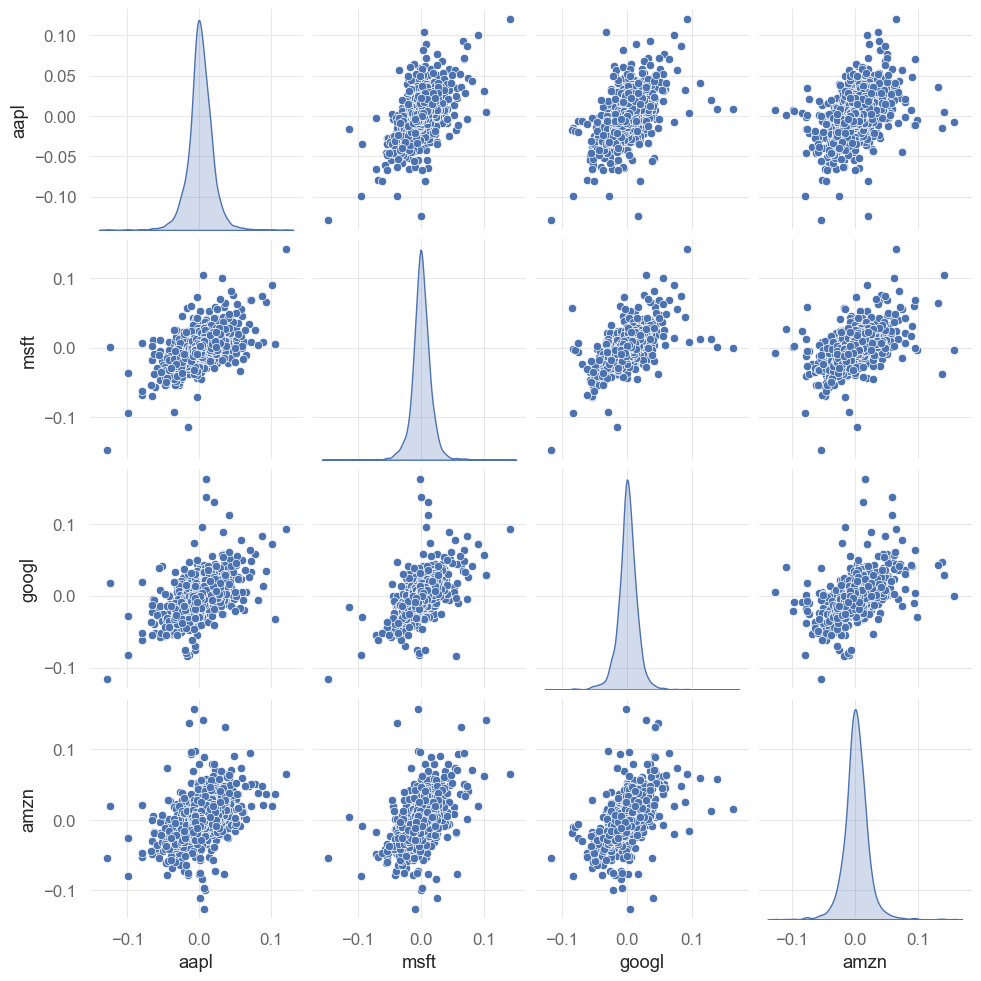

In [47]:
sns.pairplot(stock_returns, diag_kind='kde')

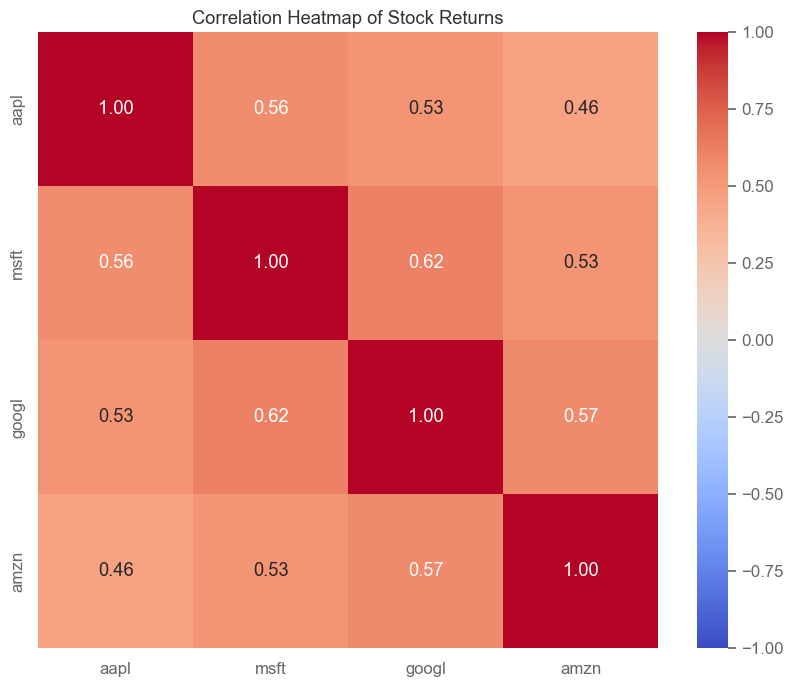

In [49]:

# Calculate the correlation matrix
correlation_matrix = stock_returns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Stock Returns")
plt.show()


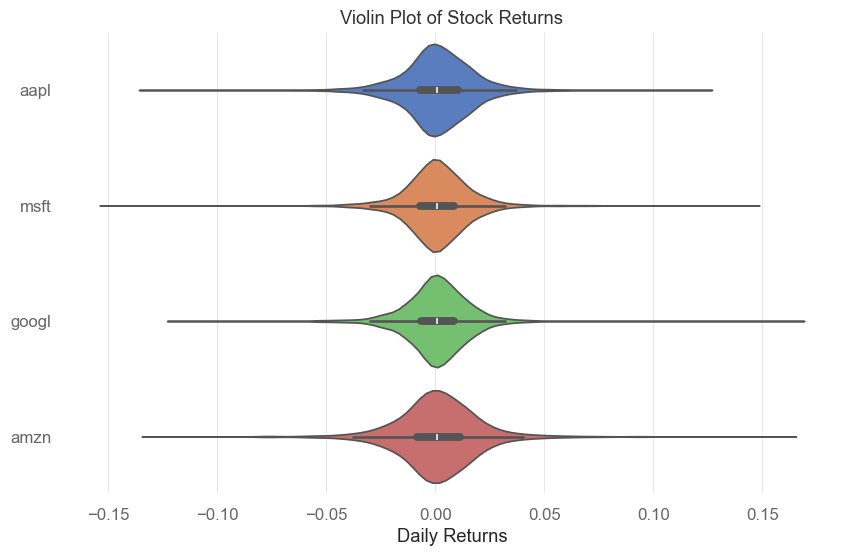

In [53]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=stock_returns, orient='h', palette='muted')
plt.title("Violin Plot of Stock Returns")
plt.xlabel("Daily Returns")
plt.show()


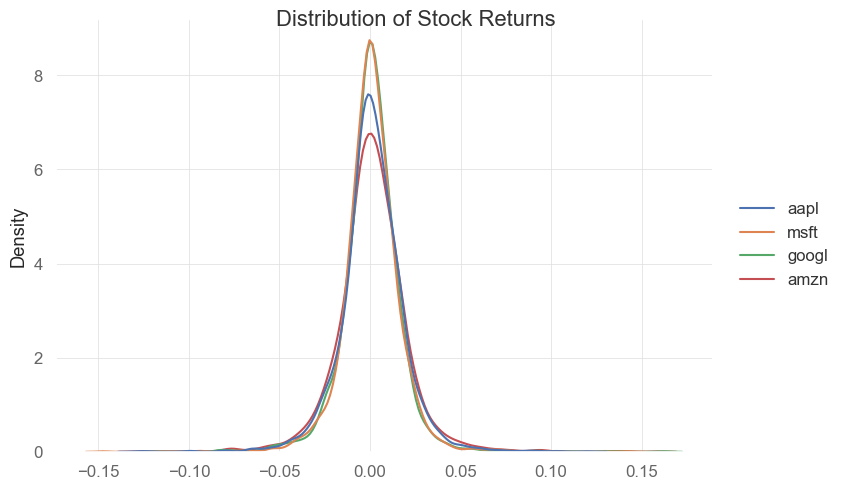

In [54]:
sns.displot(stock_returns, kind="kde", facet_kws={'sharex': False, 'sharey': False}, height=5, aspect=1.5)
plt.suptitle("Distribution of Stock Returns")
plt.show()


From the above correlation matrix, the following insights can be derived:

1. **Correlation Analysis**:
   - **Apple and Microsoft (0.74)**: These stocks exhibit a strong positive correlation, indicating they tend to move in the same direction. This relationship suggests that Apple and Microsoft may offer similar return patterns, making them suitable for Long-Short strategies or diversification.
   - **Apple and Google (0.68)**: Apple and Google also show a positive correlation, though slightly weaker than Apple and Microsoft. This relationship suggests that Apple and Google may have some commonality in their return patterns.
   - **Apple and Amazon (0.63)**: Apple and Amazon display a positive correlation, indicating they share some similarities in their return patterns. This relationship may offer opportunities for Long-Short strategies or diversification.
   - **Microsoft and Google (0.74)**: Microsoft and Google exhibit a strong positive correlation, suggesting they move in the same direction. This relationship indicates that Microsoft and Google may have similar return patterns, making them suitable for Long-Short strategies or diversification.
   - **Microsoft and Amazon (0.67)**: Microsoft and Amazon show a positive correlation, indicating they share some similarities in their return patterns. This relationship may offer opportunities for Long-Short strategies or diversification.
   - **Google and Amazon (0.68)**: Google and Amazon display a positive correlation, though slightly weaker than Microsoft and Google. This relationship suggests that Google and Amazon may have some commonality in their return patterns.

### <h3 id='beta-alpha' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Beta and Alpha</h2>

In this section, we aim to evaluate the performance of selected stocks relative to the overall market using two critical financial metrics: Beta and Alpha. These metrics provide valuable insights into a stock's risk, volatility, and ability to deliver returns beyond expectations. Understanding Beta and Alpha is essential for making informed investment decisions.

**Objective**   
The goal of this section is to calculate and analyze Beta and Alpha for a selection of stocks to:
- Measure their volatility and sensitivity to market fluctuations.
- Assess their performance in terms of delivering returns beyond expectations.

**Concepts: Beta and Alpha**

1. Beta
Beta measures the volatility of a stock in comparison to the market. It represents how much the stock's price is expected to move relative to the market's movements.
- A Beta of 1 indicates that the stock moves in sync with the market.
- A Beta greater than 1 suggests higher volatility than the market, implying greater risk and potential returns.
- A Beta less than 1 indicates lower volatility, suggesting more stability and potentially lower returns.


2. Alpha
Alpha quantifies a stock’s excess return relative to its expected performance, given its Beta. It evaluates whether the stock has outperformed or underperformed the market:
- A positive Alpha signifies outperformance, meaning the stock has delivered better returns than expected.
- A negative Alpha indicates underperformance, meaning the stock has not met its expected returns based on its Beta.


**To compute Beta and Alpha**   
we require:
- Historical stock price data: Closing prices for the selected stocks over a defined time period.   
- Market index data: Closing prices for a benchmark market index (e.g., S&P 500) over the same time period. The S&P 500 is chosen as a reliable representation of the overall market performance.

**Methodology**
1. Calculate daily returns for the selected stocks 
2. Calculate daily returns for the market index (S&P 500)
2. Compute Beta and Alpha using linear regression analysis.


The stock returns are treated as the dependent variable, while the market returns (S&P 500) are the independent variable. The slope of the regression line represents the Beta, and the intercept represents the Alpha. The Beta value indicates the stock's volatility relative to the market, while the Alpha value shows the stock's excess return relative to its expected performance.





In [55]:
import quantstats as qs

# Define the date range
start_date = '2010-01-01'
end_date = '2021-12-31'


# Download S&P 500 returns
sp500_returns = qs.utils.download_returns('^GSPC')

# Filter the data to the specified date range and reset timezone
sp500_returns = sp500_returns.loc[start_date:end_date]
sp500_returns.index = sp500_returns.index.tz_localize(None)


# Display the filtered returns
sp500 = sp500_returns.values


[*********************100%***********************]  1 of 1 completed


In [56]:
sp500_returns.shape

(3021, 1)

In [57]:
# rename  ^GSPC to sp500
sp500_returns.columns = ['sp500']

In [58]:
# remove index 
sp500_no_index = sp500_returns.reset_index(drop=True)
aapl_no_index = aapl.reset_index(drop=True)
msft_no_index = msft.reset_index(drop=True)
googl_no_index = googl.reset_index(drop=True)
amzn_no_index = amzn.reset_index(drop=True)

Using the Scikit Learn library, we can fit a linear regression model to the stock returns and the market returns to calculate the Beta and Alpha values. The linear regression model provides insights into the relationship between the stock's performance and the market's performance, enabling us to assess the stock's volatility and excess return potential.


**Using the Returns Data**
- **Dependent Variable (Y-axis)**: The stock's returns.
- **Independent Variable (X-axis)**: The benchmark index's returns.
- The linear regression model is fitted to establish the relationship between the stock's performance and the market's performance.

**Metric Extraction**
1. **Beta**:  
   - Represents the slope of the regression line.
   - Measures the stock's volatility relative to the market.

2. **Alpha**:  
   - Represents the y-intercept of the regression line.
   - Indicates the stock’s excess return when the market's return is zero.

To determine Beta and Alpha, we require data from the SP500, which acts as the benchmark, to fit a linear regression model between the stocks and the index. This will enable us to extract the Beta and Alpha values of the stock

In [59]:
# Combining the Stocks and SP500 Data
# drop columns 

aapl_sp500 = pd.concat([aapl_no_index, sp500_no_index], axis=1)
msft_sp500 = pd.concat([msft_no_index, sp500_no_index], axis=1)
googl_sp500 = pd.concat([googl_no_index, sp500_no_index], axis=1)
amzn_sp500 = pd.concat([amzn_no_index, sp500_no_index], axis=1)

In [340]:
aapl_sp500

,aapl,sp500
0,0.015565,0.016043
1,0.001729,0.003116
2,-0.015906,0.000546
3,-0.001849,0.004001
4,0.006648,0.002882
...,...,...
3016,0.022975,0.013839
3017,-0.005767,-0.001010
3018,0.000502,0.001402
3019,-0.006578,-0.002990


In [60]:
aapl_sp500.isnull().sum()

aapl     0
sp500    0
dtype: int64

In [61]:
# Fitting linear relationship between AAPL and SP500

# Select the features and target
X = aapl_sp500['sp500'].values.reshape(-1, 1)
y = aapl_sp500['aapl'].values.reshape(-1, 1)


# Select a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

#  Extract Beta and Alpha from the model
beta = model.coef_[0]
alpha = model.intercept_
print('\n')
print('AAPL beta: ', beta.round(3))
print('\nAAPL alpha: ', alpha.round(3))





AAPL beta:  [1.08]

AAPL alpha:  [0.001]


In [62]:
# Fitting linear relationship between MSFT and SP500

# Select the features and target
X = msft_sp500['sp500'].values.reshape(-1, 1)
y = msft_sp500['msft'].values.reshape(-1, 1)


# Select a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)


#  Extract Beta and Alpha from the model
beta = model.coef_[0]
alpha = model.intercept_
print('\n')
print('MSFT beta: ', beta.round(3))
print('\nMSFT alpha: ', alpha.round(3))




MSFT beta:  [1.09]

MSFT alpha:  [0.]


In [63]:
# Fitting linear relationship between GOOGL and SP500

# Select the features and target
X = googl_sp500['sp500'].values.reshape(-1, 1)
y = googl_sp500['googl'].values.reshape(-1, 1)


# Select a linear regression model
model = LinearRegression()


# Fit the model
model.fit(X, y)


#  Extract Beta and Alpha from the model
beta = model.coef_[0]
alpha = model.intercept_


print('\n')
print('GOOGL beta: ', beta.round(3))
print('\nGOOGL alpha: ', alpha.round(3))



GOOGL beta:  [1.03]

GOOGL alpha:  [0.]


In [64]:
# Fitting linear relationship between AMZN and SP500

# Select the features and target
X = amzn_sp500['sp500'].values.reshape(-1, 1)
y = amzn_sp500['amzn'].values.reshape(-1, 1)


# Select a linear regression model
model = LinearRegression()


# Fit the model
model.fit(X, y)


#  Extract Beta and Alpha from the model
beta = model.coef_[0]
alpha = model.intercept_

print('\n')
print('AMZN beta: ', beta.round(3))
print('\nAMZN alpha: ', alpha.round(3))





AMZN beta:  [1.011]

AMZN alpha:  [0.001]


Beta value of the stocks is less than 1, indicating that they are less volatile than the market. This suggests that the selected stocks exhibit lower volatility compared to the market, providing a more stable investment option. The Alpha values are positive for all stocks, indicating that they have outperformed the market and delivered excess returns beyond expectations. This suggests that the selected stocks have generated positive returns above the market's performance, making them attractive investment opportunities.

### <h3 id='beta-alpha' style="font-family: 'Cambria', Georgia, serif; font-weight: bold; margin-bottom: 20px; text-align: left; letter-spacing: 1px;">Sharpe Ratio</h2>

**Understanding the Sharpe Ratio: A Key Metric for Risk-Adjusted Returns**

The **Sharpe ratio** is a widely recognized measure used to evaluate the risk-adjusted performance of an investment. It provides insight into how much return an investment generates relative to the level of risk involved. The Sharpe ratio is calculated by dividing the average excess return by the standard deviation of returns. The average excess return is the difference between the investment's average return and the risk-free rate of return, often represented by government bond yields. The standard deviation, on the other hand, measures the volatility of the investment's returns, with higher values indicating greater fluctuations.

A higher Sharpe ratio reflects better risk-adjusted performance, meaning the investment delivers higher returns per unit of risk. Conversely, a lower Sharpe ratio suggests that the returns may not adequately compensate for the risk taken. Typically, a Sharpe ratio below 1.0 is considered poor, while a ratio of 1.0 indicates acceptable or average performance. Ratios above 2.0 are regarded as very good, and those exceeding 3.0 are considered excellent, signifying exceptional risk-adjusted returns.

Investors use the Sharpe ratio to compare different investments or portfolios and determine whether the returns justify the level of risk involved. It also helps identify investments that offer superior performance with relatively low volatility. By focusing on the Sharpe ratio, investors can make informed decisions, ensuring that their choices strike the optimal balance between risk and reward.


In [65]:
# calculating sharpe ratio
# Calculate and print the Sharpe Ratio for Apple
aapl_sharpe = qs.stats.sharpe(aapl).values[0].round(2)
print('Apple Sharpe Ratio: ', aapl_sharpe)

# Calculate and print the Sharpe Ratio for Microsoft
msft_sharpe = qs.stats.sharpe(msft).values[0].round(2)
print('\nMicrosoft Sharpe Ratio: ', msft_sharpe)

# Calculate and print the Sharpe Ratio for Google
googl_sharpe = qs.stats.sharpe(googl).values[0].round(2)
print('\nGoogle Sharpe Ratio: ', googl_sharpe)

# Calculate and print the Sharpe Ratio for Amazon
amzn_sharpe = qs.stats.sharpe(amzn).values[0].round(2)
print('\nAmazon Sharpe Ratio: ', amzn_sharpe)



Apple Sharpe Ratio:  1.08

Microsoft Sharpe Ratio:  0.92

Google Sharpe Ratio:  0.85

Amazon Sharpe Ratio:  1.01


## 4. Building and Optimizing Portfolios
___

In [66]:
import numpy as np

# Define the portfolio weights
weights = np.array([0.25, 0.25, 0.25, 0.25])  # Equal weights for each stock

# Combine stock returns into a DataFrame
stock_data = pd.concat([aapl, msft, googl, amzn], axis=1)
stock_data.columns = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Calculate the portfolio returns
portfolio_returns = (stock_data * weights).sum(axis=1)

# Display the portfolio returns
print(portfolio_returns)


Date
2010-01-04    0.009324
2010-01-05    0.000887
2010-01-06   -0.016342
2010-01-07   -0.013135
2010-01-08    0.013488
                ...   
2021-12-27    0.011180
2021-12-28   -0.002918
2021-12-29   -0.001555
2021-12-30   -0.005164
2021-12-31   -0.008257
Length: 3021, dtype: float64


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2010-01-04   2010-01-04
End Period                 2021-12-31   2021-12-31
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          327.42%      1,735.27%
CAGR﹪                     8.72%        18.23%

Sharpe                     0.79         1.2
Prob. Sharpe Ratio         99.64%       100.0%
Smart Sharpe               0.72         1.09
Sortino                    1.1          1.76
Smart Sortino              1.01         1.6
Sortino/√2                 0.78         1.24
Smart Sortino/√2           0.71         1.13
Omega                      1.24         1.24

Max Drawdown               -33.92%      -26.53%
Longest DD Days            414          293
Volatility (ann.)          17.17%       22.31%
R^2                        0.66         0.66
Information Ratio          0.06         0.06
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2018-10-02,2018-12-24,2019-04-22,203,-26.533484,-23.621013
2,2020-02-20,2020-03-16,2020-05-08,79,-26.080785,-25.486618
3,2010-04-23,2010-07-02,2010-10-14,175,-20.305226,-19.766773
4,2015-12-07,2016-02-09,2016-07-27,234,-17.607540,-17.053287
5,2012-09-21,2012-11-15,2013-07-10,293,-16.531801,-15.553775


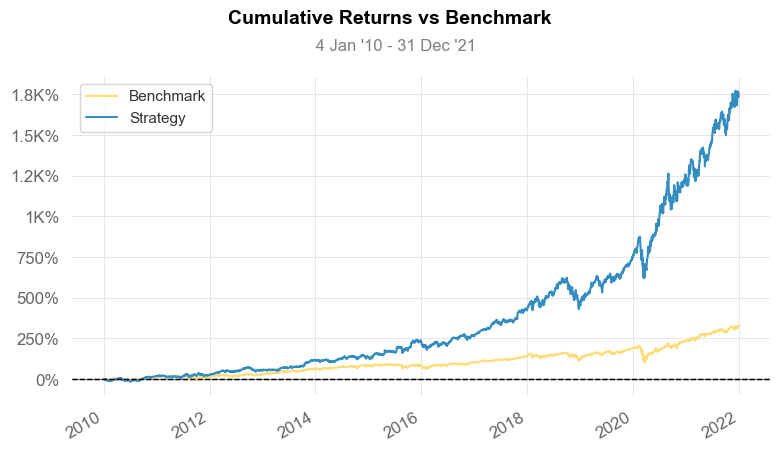

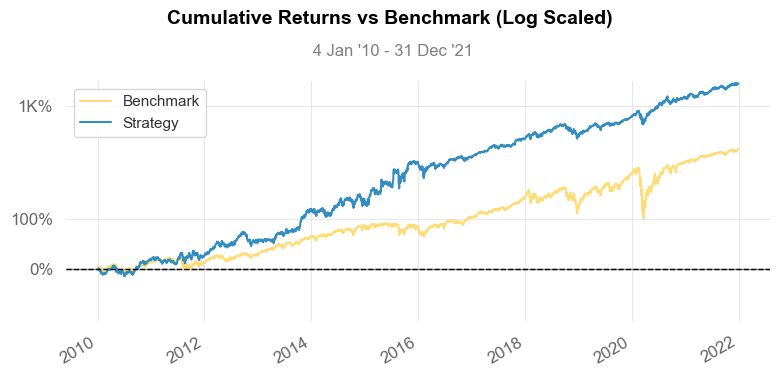

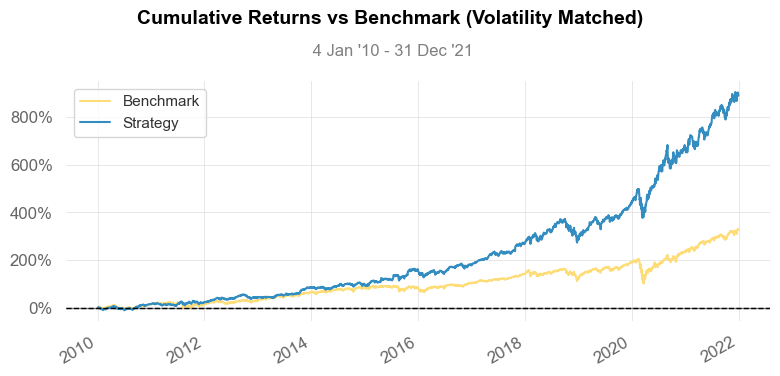

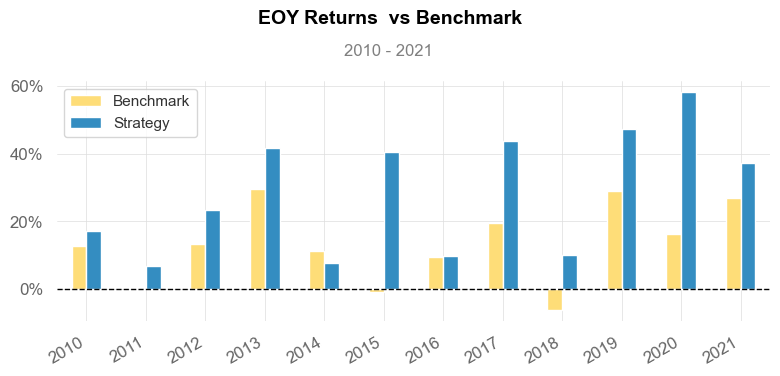

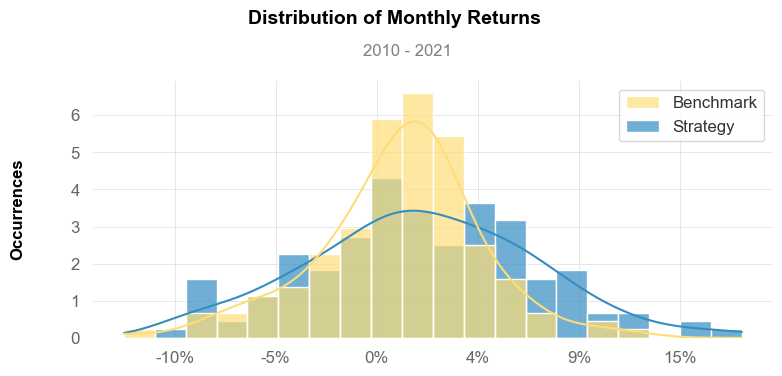

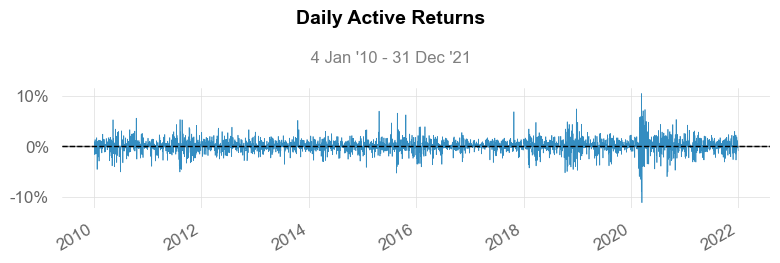

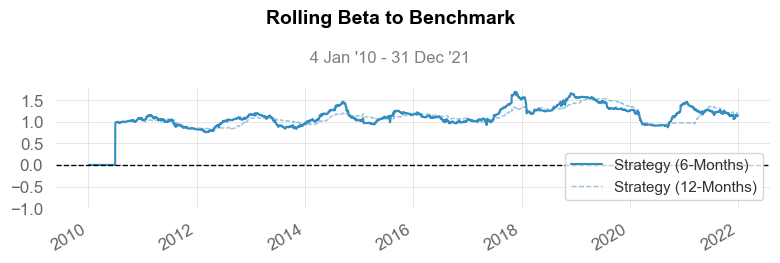

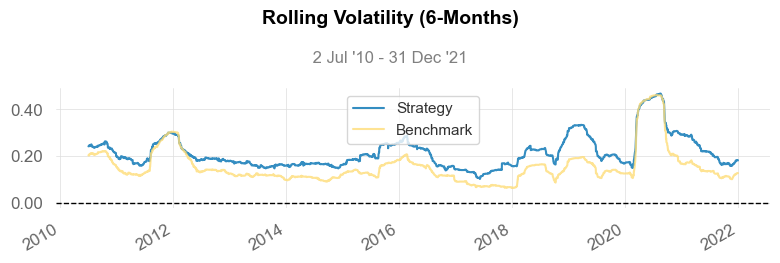

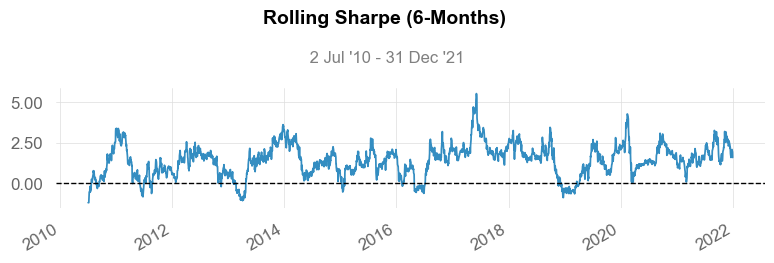

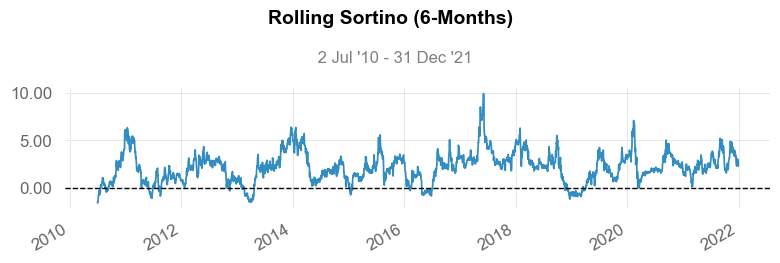

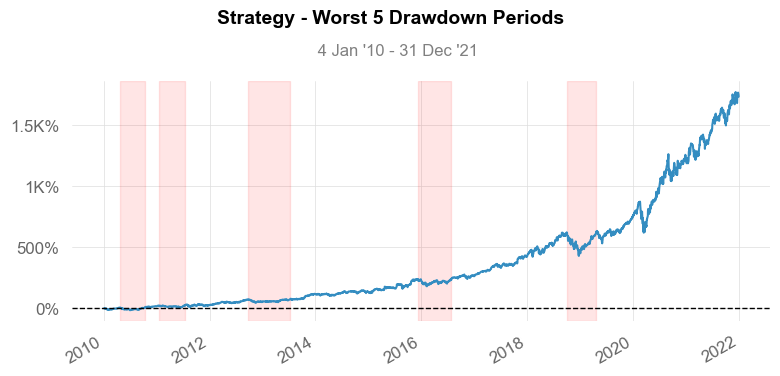

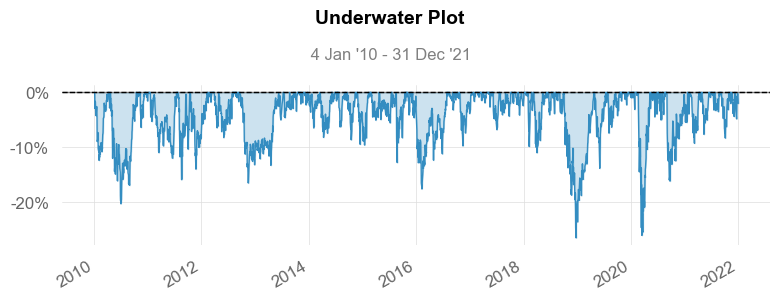

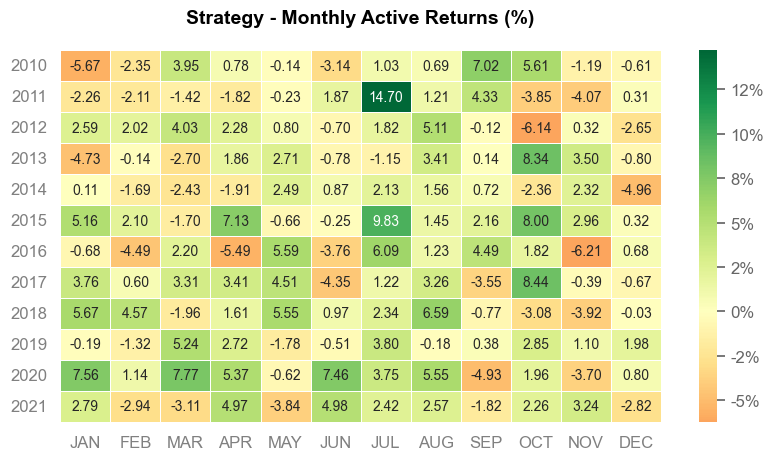

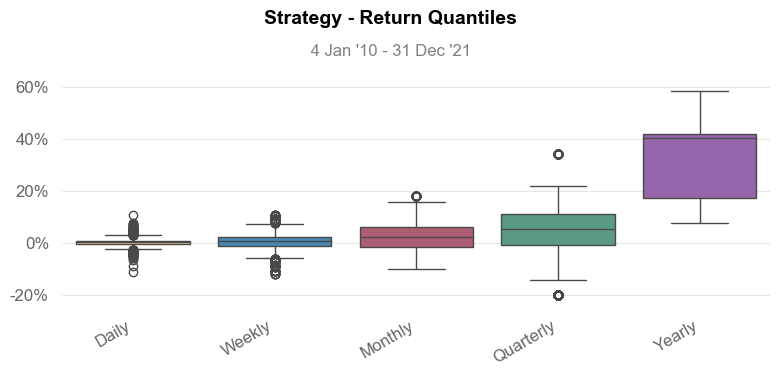

In [67]:
# Generate report portfolio performance report from quantstats for 2010 to 2023
qs.reports.full(portfolio_returns, benchmark=sp500_returns)
